# "A Basic Neural Network: Differentiate Hand-Written Digits"

- badges: true
- author: Akshith Sriram

### Key Objectives:
- Building a neural network that differentiates two hand-written digits 3 and 8.
- Comparing the results of this Neural Network (NN) to that of a Logistic Regression (LR) model.

### Requirements:
- 'Kudzu' : A neural network library that was designed during our course by [Univ.AI](www.univ.ai). 
- MNIST Database

If MNIST is not installed, use the command `!pip install mnist` given below.
It can be run both from the command line and Jupyter Notebook.

In [1]:
!pip install mnist 

#### Importing necessary libraries

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

### Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


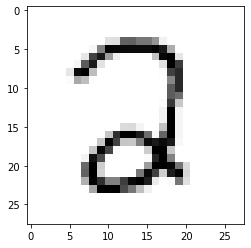

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pixel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

Setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

### Reshape the input data to create a linear array

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

### Importing appropriate functions from 'Kudzu'

In [14]:
from kudzu.layer import Sigmoid
from kudzu.layer import Relu
from kudzu.layer import Affine, Sigmoid

from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 251
config.bs = 50

### Initializing data to the variables

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [17]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.

Help taken from Anshuman's Notebook.

In [18]:
# layers for the Neural Network
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model_nn = Model(layers)

# layers for the Logistic Regression
layers_lr = [Affine("logits", 784, 1), Sigmoid("sigmoid")]
model_lr = Model(layers_lr)

In [19]:
# suffix _nn stands for Neural Network.
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_nn.set_callbacks([acc_nn])

In [20]:
print("====== Neural Network ======")
learner_nn.train_loop(dl)

====== Neural Network ======


Epoch 0, Loss 0.2472
Training Accuracy: 0.6120, Testing Accuracy: 0.6220



Epoch 10, Loss 0.1856
Training Accuracy: 0.8746, Testing Accuracy: 0.8952



Epoch 20, Loss 0.091
Training Accuracy: 0.9154, Testing Accuracy: 0.9254



Epoch 30, Loss 0.0591
Training Accuracy: 0.9362, Testing Accuracy: 0.9466



Epoch 40, Loss 0.0465
Training Accuracy: 0.9481, Testing Accuracy: 0.9551



Epoch 50, Loss 0.04
Training Accuracy: 0.9541, Testing Accuracy: 0.9587



Epoch 60, Loss 0.0361
Training Accuracy: 0.9587, Testing Accuracy: 0.9617



Epoch 70, Loss 0.0335
Training Accuracy: 0.9603, Testing Accuracy: 0.9632



Epoch 80, Loss 0.0315
Training Accuracy: 0.9622, Testing Accuracy: 0.9642



Epoch 90, Loss 0.0299
Training Accuracy: 0.9643, Testing Accuracy: 0.9662



Epoch 100, Loss 0.0287
Training Accuracy: 0.9655, Testing Accuracy: 0.9682



Epoch 110, Loss 0.0276
Training Accuracy: 0.9670, Testing Accuracy: 0.9698



Epoch 120, Loss 0.0266
Training Accuracy: 0.9682, Testing Accuracy: 0.9723



Epoch 130, Loss 0.0258
Training Accuracy: 0.9693, Testing Accuracy: 0.9728



Epoch 140, Loss 0.0251
Training Accuracy: 0.9703, Testing Accuracy: 0.9733



Epoch 150, Loss 0.0244
Training Accuracy: 0.9713, Testing Accuracy: 0.9728



Epoch 160, Loss 0.0238
Training Accuracy: 0.9719, Testing Accuracy: 0.9728



Epoch 170, Loss 0.0232
Training Accuracy: 0.9726, Testing Accuracy: 0.9728



Epoch 180, Loss 0.0227
Training Accuracy: 0.9735, Testing Accuracy: 0.9728



Epoch 190, Loss 0.0222
Training Accuracy: 0.9737, Testing Accuracy: 0.9728



Epoch 200, Loss 0.0217
Training Accuracy: 0.9744, Testing Accuracy: 0.9728



Epoch 210, Loss 0.0213
Training Accuracy: 0.9752, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0209
Training Accuracy: 0.9759, Testing Accuracy: 0.9728



Epoch 230, Loss 0.0205
Training Accuracy: 0.9763, Testing Accuracy: 0.9733



Epoch 240, Loss 0.0201
Training Accuracy: 0.9767, Testing Accuracy: 0.9738



Epoch 250, Loss 0.0197
Training Accuracy: 0.9771, Testing Accuracy: 0.9743



0.033844991255211856

### Logistic Regression based Implementation.

In [21]:
learner_lr = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(learner_lr, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner_lr.set_callbacks([acc_lr])

In [22]:
print("====== Logistic Regression ======")
learner_lr.train_loop(dl)

====== Logistic Regression ======
Epoch 0, Loss 0.2525
Training Accuracy: 0.6278, Testing Accuracy: 0.6200



Epoch 10, Loss 0.1039
Training Accuracy: 0.9104, Testing Accuracy: 0.9128



Epoch 20, Loss 0.0791
Training Accuracy: 0.9277, Testing Accuracy: 0.9375



Epoch 30, Loss 0.0679
Training Accuracy: 0.9362, Testing Accuracy: 0.9451



Epoch 40, Loss 0.0613
Training Accuracy: 0.9423, Testing Accuracy: 0.9521



Epoch 50, Loss 0.0568
Training Accuracy: 0.9453, Testing Accuracy: 0.9536



Epoch 60, Loss 0.0535
Training Accuracy: 0.9470, Testing Accuracy: 0.9592



Epoch 70, Loss 0.051
Training Accuracy: 0.9483, Testing Accuracy: 0.9592



Epoch 80, Loss 0.049
Training Accuracy: 0.9499, Testing Accuracy: 0.9617



Epoch 90, Loss 0.0473
Training Accuracy: 0.9511, Testing Accuracy: 0.9617



Epoch 100, Loss 0.0459
Training Accuracy: 0.9520, Testing Accuracy: 0.9632



Epoch 110, Loss 0.0447
Training Accuracy: 0.9527, Testing Accuracy: 0.9632



Epoch 120, Loss 0.0437
Training Accuracy: 0.9538, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0428
Training Accuracy: 0.9548, Testing Accuracy: 0.9647



Epoch 140, Loss 0.042
Training Accuracy: 0.9553, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0412
Training Accuracy: 0.9556, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0406
Training Accuracy: 0.9559, Testing Accuracy: 0.9657



Epoch 170, Loss 0.04
Training Accuracy: 0.9565, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0394
Training Accuracy: 0.9569, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0389
Training Accuracy: 0.9572, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0384
Training Accuracy: 0.9579, Testing Accuracy: 0.9657



Epoch 210, Loss 0.038
Training Accuracy: 0.9584, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0376
Training Accuracy: 0.9594, Testing Accuracy: 0.9657



Epoch 230, Loss 0.0372
Training Accuracy: 0.9598, Testing Accuracy: 0.9662



Epoch 240, Loss 0.0368
Training Accuracy: 0.9604, Testing Accuracy: 0.9667



Epoch 250, Loss 0.0365
Training Accuracy: 0.9607, Testing Accuracy: 0.9672



0.030423291379720392

### Comparing results of NN and LR

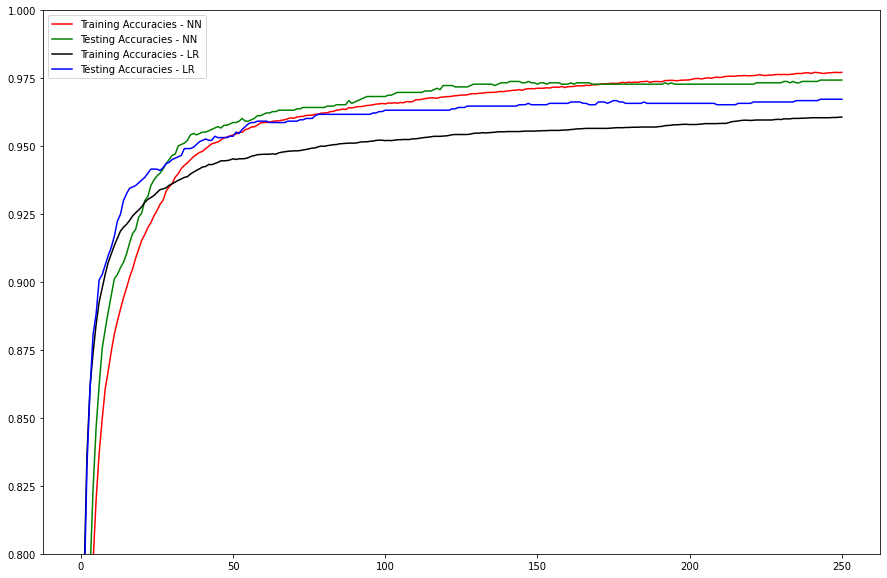

In [23]:
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")

plt.ylim(0.8, 1)

plt.legend()



### From the plot, we can observe the following:
- Neural Network achieves higher accuracy than the Logistic Regression model.
- This apparently, is because of overfitting, i.e. NN captures more noise than data.
- Testing accuracy of NN drops below the Training accuracy at higher epochs. This explains the over-fitting on training data.
- Logistic Regression gives a reliable accuracy, without the above mentioned problem.


### Moving till the last but one layer (excluding it).
#### Plotting the outputs of this layer of the NN.

In [24]:
model_new = Model(layers[:-2])

In [25]:
plot_testing = model_new(testing_xdata)

Text(0.5, 1.0, 'Outputs')

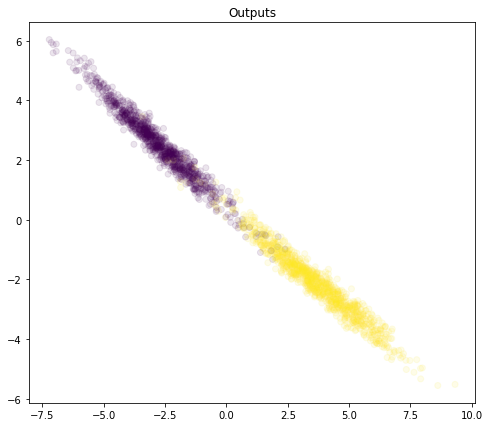

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

### Plotting probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
# Adjust the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_grid_flat = np.ravel(x_grid)
y_grid_flat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_grid_flat, y_grid_flat)).T

# x_grid and y_grid are of size 100 x 100
probability_contour = model_prob(X).reshape(100,100) 

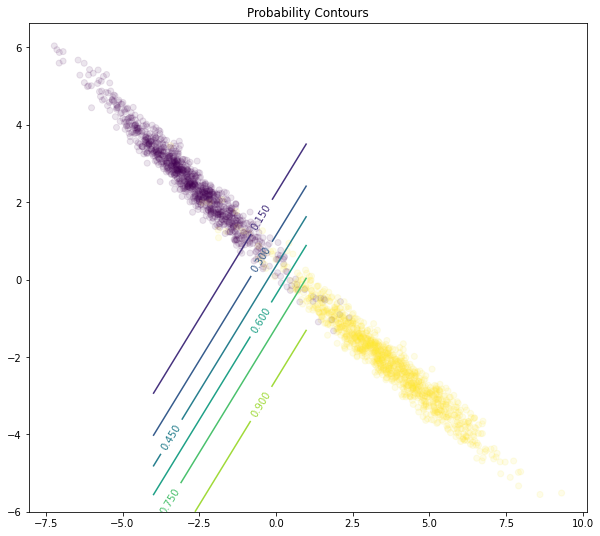

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,probability_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );